In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from PIL import Image

#Cargamos imágenes
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/train')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image=Image.open(filepath)
            new_img = image.resize((350,350))#Redimencionamos todas las imagenes a un mismo tamaño
            new_img.save('s.png','png')#Las guardamos
            image = plt.imread('s.png')#Las leemos pero ahora para convertirlas en arrays
            if len(image.shape)==3:#Las imagenes que son a color las filtramos para convertirlas a blanco y negro
              image=Image.open(filepath)
              image=image.convert('L')#Convertimos la imagen en blanco y negro
              new_img = image.resize((350,350))#Aquí redimencionamos porque abrimos la imagen original no la recortada
              new_img.save('s.png','png')
              image = plt.imread('s.png')
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/train/
/content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/train/Covid 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/train/Normal 111
/content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/train/Viral Pneumonia 70
Directorios leidos: 3
Imagenes en cada directorio [112, 70, 69]
suma Total de imagenes en subdirectorios: 251


In [ ]:
#Creamos las etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  251


In [ ]:
#Indicamos la etiquiqueta con el nombre de la clase(diagnostico)
casos=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    casos.append(name[len(name)-1])
    indice=indice+1

0 Covid
1 Normal
2 Viral Pneumonia


In [ ]:
#convierto de lista a numpy
y = np.array(labels)
X = np.array(images) 


classes = np.unique(y)
nClasses = len(classes)
print('Total de npumero de salidad: ', nClasses)

print('Salida de cada clase : ', classes)
train_X=X
train_Y=y
print('Training data shape : ', train_X.shape, train_Y.shape)

Total de npumero de salidad:  3
Salida de cada clase :  [0 1 2]
Training data shape :  (251, 350, 350) (251,)


(251, 350, 350)


Text(0.5, 1.0, 'Ground Truth : 2')

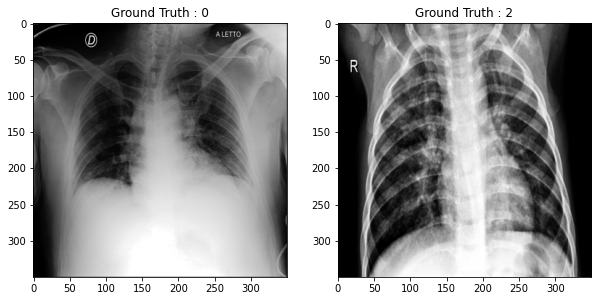

In [ ]:

plt.figure(figsize=[10,10])
print(train_X.shape)
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(train_X[222,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[222]))

In [ ]:

#Cargamos imágenes
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/test')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image=Image.open(filepath)
            new_img = image.resize((350,350))
            new_img.save('s.png','png')
            image = plt.imread('s.png')#Cortamos las imágenes
            if len(image.shape)==3:
              image=Image.open(filepath)
              image=image.convert('L')
              new_img = image.resize((350,350))
              new_img.save('s.png','png')
              image = plt.imread('s.png')
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/test/
/content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/test/Covid 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/test/Normal 26
/content/drive/MyDrive/archive.zip (Unzipped Files)/covid/Covid19-dataset/test/Viral Pneumonia 20
Directorios leidos: 3
Imagenes en cada directorio [27, 20, 19]
suma Total de imagenes en subdirectorios: 66


In [ ]:
#Creamos las etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  66


In [ ]:
#Indicamos la etiquiqueta con el nombre de la flor
diagnostico=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    diagnostico.append(name[len(name)-1])
    indice=indice+1

0 Covid
1 Normal
2 Viral Pneumonia


In [ ]:
#convierto de lista a numpy
y = np.array(labels)
X = np.array(images) 


classes = np.unique(y)
nClasses = len(classes)
print('Total de npumero de salidad: ', nClasses)

print('Salida de cada clase : ', classes)
test_X=X
test_Y=y
print('Training data shape : ', test_X.shape, test_Y.shape)

Total de npumero de salidad:  3
Salida de cada clase :  [0 1 2]
Training data shape :  (66, 350, 350) (66,)


Text(0.5, 1.0, 'Ground Truth : 1')

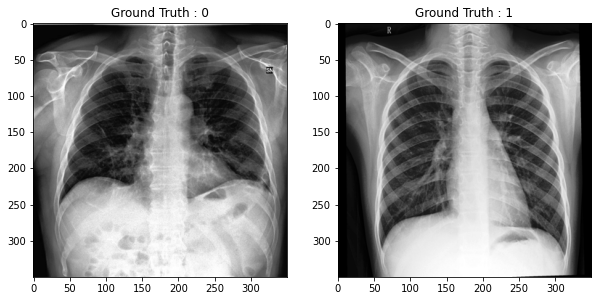

In [ ]:
#Graficamos un par de imagenes
plt.figure(figsize=[10,10])

plt.subplot(121)
plt.imshow(test_X[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[40,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[40]))

In [ ]:
# Cambiamos las etiquetas a one-hot encondig
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


print('Etiqueta original:', train_Y[0])
print('Etiqueta en one-hot:', train_Y_one_hot[0])

Etiqueta original: 0
Etiqueta en one-hot: [1. 0. 0.]


In [ ]:
#Crear los grupos de entrenamiento y validación
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(225, 350, 350) (26, 350, 350) (225, 3) (26, 3)


In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = .002 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 10 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 15 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
covid_model = Sequential()
covid_model.add(Conv2D(16, kernel_size=(5, 5),activation='relu',padding='same',input_shape=(350,350,1)))
covid_model.add(MaxPooling2D((3, 3),padding='same'))

covid_model.add(Conv2D(16, kernel_size=(5, 5),activation='relu',padding='same'))
covid_model.add(MaxPooling2D((3, 3),padding='same'))

covid_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
covid_model.add(MaxPooling2D((3, 3),padding='same'))

covid_model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same'))
covid_model.add(MaxPooling2D((3, 3),padding='same'))

covid_model.add(Flatten())
covid_model.add(Dense(128, activation='relu'))
covid_model.add(Dropout(0.25))

covid_model.add(Dense(nClasses, activation='softmax'))

In [ ]:
covid_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),
                     metrics=['accuracy'])

In [ ]:
# Modificamos la dimensión de las imágenes de (350,350) a  ( 350, 350, 1) para que no haya problema con la lectura de datos
train_X = np.copy(train_X)[...,None]
test_X = np.copy(test_X)[...,None]
valid_X= np.copy(valid_X)[...,None]
print(train_X.shape,test_X.shape,valid_X.shape)

(225, 350, 350, 1) (66, 350, 350, 1) (26, 350, 350, 1)


In [ ]:
covid_train = covid_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/10
15/15 [==============================] - 21s 1s/step - loss: 0.3834 - accuracy: 0.8774 - val_loss: 0.1793 - val_accuracy: 0.9615
Epoch 2/10
15/15 [==============================] - 20s 1s/step - loss: 0.3613 - accuracy: 0.8623 - val_loss: 0.1758 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 20s 1s/step - loss: 0.3051 - accuracy: 0.8551 - val_loss: 0.1935 - val_accuracy: 0.9231
Epoch 4/10
15/15 [==============================] - 20s 1s/step - loss: 0.2970 - accuracy: 0.8768 - val_loss: 0.2273 - val_accuracy: 0.9231
Epoch 5/10
15/15 [==============================] - 20s 1s/step - loss: 0.3785 - accuracy: 0.8762 - val_loss: 0.1707 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 20s 1s/step - loss: 0.3212 - accuracy: 0.8704 - val_loss: 0.1420 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 20s 1s/step - loss: 0.3051 - accuracy: 0.8878 - val_loss: 0.1601 - val_accuracy: 1.0000
Epoch 8/10
15/15 [==

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
covid_model.save("covid_mnist.h5py")

INFO:tensorflow:Assets written to: covid_mnist.h5py/assets


In [ ]:
test_eval = covid_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

3/3 [==============================] - 2s 401ms/step - loss: 0.5936 - accuracy: 0.7727
El modelo predice el  77.27272510528564 % de los datos


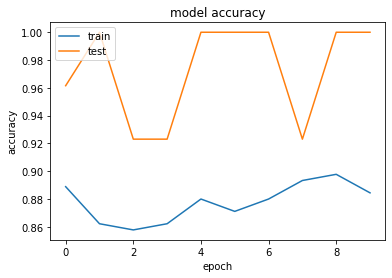

In [ ]:
# summarize history for accuracy
plt.plot(covid_train.history['accuracy'])
plt.plot(covid_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

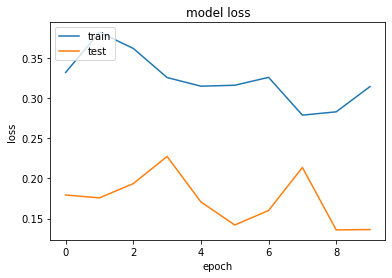

In [ ]:
plt.plot(covid_train.history['loss'])
plt.plot(covid_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()